# Practical 12: Fuzzy Logic

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html

## An Introduction to Fuzzy Logic

### What does "Fuzzy" mean?

▪ **Cambridge dictionary**: Not clear

▪ **Merriam-Webster**: lacking in clarity or definition

▪ **Collins dictionary**: Vague and not clearly defined

### Boolean Logic

▪ The classical logic block accepts exact input and outputs a definite result as TRUE or FALSE, which is comparable to YES or NO

<img src="logic4.png" width="600">

### Fuzzy Logic

▪ Humans make decisions based on a range of options between YES and NO, such as, **Certainly Yes or No**, **Possibly Yes or No**, and **Cannot**, etc.

▪ Fuzzy Logic (is a reasoning system that resembles human reasoning (based on how humans make decisions). 

▪ It takes into account **all conceivable outcomes** between the digital values YES and NO. 

<img src="logic3.png" width="600">

https://analyticsindiamag.com/how-can-fuzzy-logic-be-used-for-rule-based-decision-making/

### Fuzzy Rule-based systems 

▪ Also known as fuzzy inference systems.

▪ Fuzzy rule-based systems evaluate linguistic **"if-then"** rules using fuzzification, inference and composition. 

▪ They often produce fuzzy results that need to be converted to crisp output. 

▪ Fuzzy results are made clear by defuzzification. 

<img src="fuzzy_system.png" width="600">

## The Tipping Problem

<img src="tip.jpg" width="300">

### Questions: What would the tip be in the following 3 different circumstances

▪ **Situation \#1**: When **Food quality = 6.5** and **Service quality = 9.8**, **Tip = ?** 

▪ **Situation \#2**: When **Food quality = 6.5** and **Service quality = 3.5**, **Tip = ?** 

▪ **Situation \#3**: When **Food quality = 1.6** and **Service quality = 1.8**, **Tip = ?** 

### Python's TypeError Exception

▪ **ValueError** in Python is raised when a user gives an invalid value to a function but is of a valid argument.

https://www.educative.io/answers/what-is-valueerror-in-python

In [1]:
user_input = [[], []]

print("Please rate the food: 0 to 10")
answer = -1

while answer < 0 or answer > 10:
    try:
        answer = float(input("Answer: "))
    except ValueError:
        print("Please enter number only")
        continue
    if answer < 0 or answer > 10:
        print("Please rate the food on a scale of 0 to 10")
        
user_input[0] = answer

Please rate the food: 0 to 10
Answer: 7


In [2]:
print("Please rate the service: 0 to 10")
answer = -1

while answer < 0 or answer > 10:
    try:
        answer = float(input("Answer: "))
    except ValueError:
        print("Please enter number only")
        continue
    if answer < 0 or answer > 10:
        print("Please rate the service on a scale of 0 to 10")
        
user_input[1] = answer

Please rate the service: 0 to 10
Answer: 3


### arange()

▪ The numpy arange() function creates a new numpy array with evenly spaced numbers between start (inclusive) and stop (exclusive) with a given step.

In [5]:
import numpy as np

a = np.arange(1, 15, 2)
print(a)

[ 1  3  5  7  9 11 13]


In [6]:
a

array([ 1,  3,  5,  7,  9, 11, 13])

### Universe Variables

▪ A fuzzy variable has a crisp value which takes on some number over a **pre-defined domain** (in fuzzy logic terms, called a **universe**). 

In [7]:
univ_food = np.arange(0, 11, 1)
univ_serv = np.arange(0, 11, 1)
univ_tip = np.arange(0, 26, 1)

In [8]:
univ_food

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
univ_serv

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
univ_tip

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

### Fuzzy Membership Functions

▪ A **membership function** is a function that specifies the degree to which a given input belongs to a set.

<img src="hml.png" width="250">

▪ The output of a membership function is the degree of membership, this value is always limited to between 0 and 1. 

▪ There are different forms of membership functions such as **Triangular**, **Trapezoidal**, **Piecewise linear**, **Gaussian** and **Singleton**.

▪ **Triangular membership function** is a membership function that is formed using straight lines and these straight line membership functions have the advantage of simplicity.

https://www.philadelphia.edu.jo/academics/qhamarsheh/uploads/Lecture%2018_Different%20Types%20of%20Membership%20Functions%201.pdf

### skfuzzy

▪ **scikit-fuzzy** is a fuzzy logic Python package that works with numpy arrays.

▪ To install **skfuzzy**, open Ananconda Prompt and enter the command **pip install scikit-fuzzy**.

### trimf()

▪ The **trimf()** function is one of the most widely accepted and used triangular membership function generator. 

<img src="triangle.png">

▪ **trimf(array, \[a, b, c\])** takes 2 1d array as arguments where \[a, b, c\] is used to control the shape of triangular function where a <= b <= c.

### Generating the Membership Function of the Low Quality Food Set

<img src="triangles2.png" width="300">

In [12]:
import skfuzzy as fuzz

food_lo = fuzz.trimf(univ_food, [0, 0, 5])

In [13]:
help(fuzz.trimf)

Help on function trimf in module skfuzzy.membership.generatemf:

trimf(x, abc)
    Triangular membership function generator.
    
    Parameters
    ----------
    x : 1d array
        Independent variable.
    abc : 1d array, length 3
        Three-element vector controlling shape of triangular function.
        Requires a <= b <= c.
    
    Returns
    -------
    y : 1d array
        Triangular membership function.



In [14]:
print(type(food_lo))

<class 'numpy.ndarray'>


In [15]:
food_lo

array([1. , 0.8, 0.6, 0.4, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ])

### Degree of Membership Across The Universe

▪ food_lo represents the degree of membership to low quality food set for all input ratings (0 to 10).

In [16]:
print("Rating", "Low")
for i in range(len(univ_food)):
    print("{:<7d}{:<4.1f}".format(univ_food[i], food_lo[i]))

Rating Low
0      1.0 
1      0.8 
2      0.6 
3      0.4 
4      0.2 
5      0.0 
6      0.0 
7      0.0 
8      0.0 
9      0.0 
10     0.0 


### Generating the Membership Function of the Medium Quality Food and High Quality Food Sets

In [17]:
food_me = fuzz.trimf(univ_food, [0, 5, 10])
food_hi = fuzz.trimf(univ_food, [5, 10, 10])

### Degree of Membership Across The Universe

In [18]:
print("{:7s}{:6s}{:6s}{:6s}".format("Rating", "Low", "Med", "Hi"))
for i in range(len(univ_food)):
    print("{:<7d}{:<6.1f}{:<6.1f}{:<6.1f}".format(univ_food[i], food_lo[i], food_me[i], food_hi[i]))

Rating Low   Med   Hi    
0      1.0   0.0   0.0   
1      0.8   0.2   0.0   
2      0.6   0.4   0.0   
3      0.4   0.6   0.0   
4      0.2   0.8   0.0   
5      0.0   1.0   0.0   
6      0.0   0.8   0.2   
7      0.0   0.6   0.4   
8      0.0   0.4   0.6   
9      0.0   0.2   0.8   
10     0.0   0.0   1.0   


### Food Quality: Plotting The Degree of Membership Across The Universe

Text(0.5, 1.0, 'Low Quality Food')

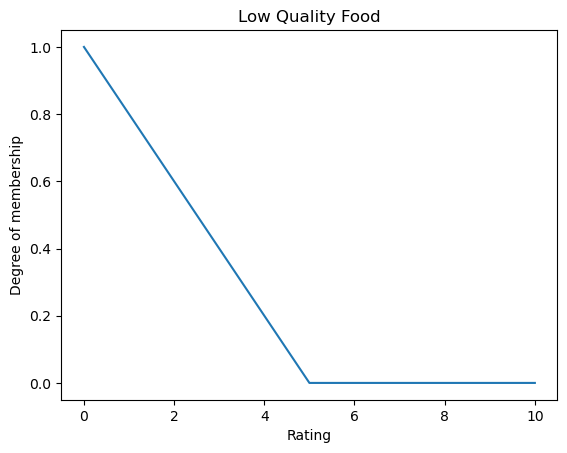

In [30]:
import matplotlib.pyplot as pl

fig = pl.figure()
pl.xlabel('Rating')
pl.ylabel('Degree of membership')
pl.plot(univ_food, food_lo)
pl.title("Low Quality Food")

Text(0.5, 1.0, 'Medium Quality Food')

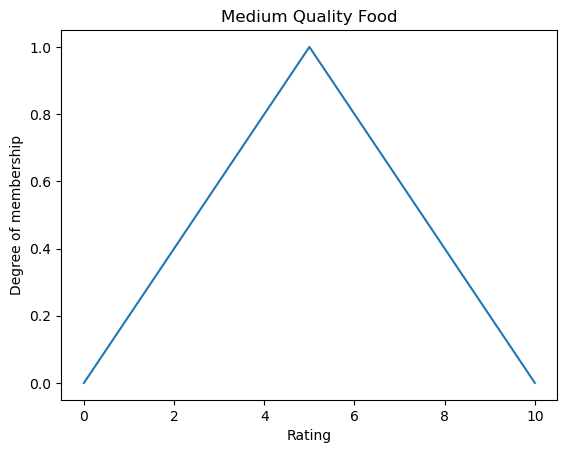

In [31]:
fig = pl.figure()
pl.xlabel('Rating')
pl.ylabel('Degree of membership')
pl.plot(univ_food, food_me)
pl.title("Medium Quality Food")

Text(0.5, 1.0, 'Hi Quality Food')

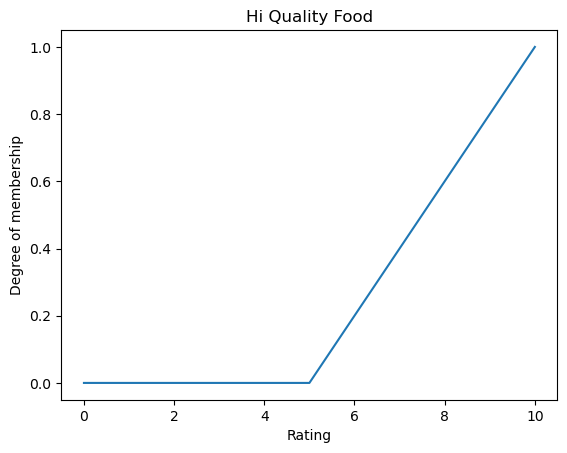

In [32]:
fig = pl.figure()
pl.xlabel('Rating')
pl.ylabel('Degree of membership')
pl.plot(univ_food, food_hi)
pl.title("Hi Quality Food")

### Specifying the Membership Function of the Service Quality Sets

In [33]:
serv_lo = fuzz.trimf(univ_serv, [0, 0, 5])
serv_me = fuzz.trimf(univ_serv, [0, 5, 10])
serv_hi = fuzz.trimf(univ_serv, [5, 10, 10])

### Specifying the Membership Function of the Tips Amount Sets

In [34]:
tip_lo = fuzz.trimf(univ_tip, [0, 0, 13])
tip_me = fuzz.trimf(univ_tip, [0, 13, 25])
tip_hi = fuzz.trimf(univ_tip, [13, 25, 25])

In [35]:
tip_lo

array([1.        , 0.92307692, 0.84615385, 0.76923077, 0.69230769,
       0.61538462, 0.53846154, 0.46153846, 0.38461538, 0.30769231,
       0.23076923, 0.15384615, 0.07692308, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [36]:
tip_me

array([0.        , 0.07692308, 0.15384615, 0.23076923, 0.30769231,
       0.38461538, 0.46153846, 0.53846154, 0.61538462, 0.69230769,
       0.76923077, 0.84615385, 0.92307692, 1.        , 0.91666667,
       0.83333333, 0.75      , 0.66666667, 0.58333333, 0.5       ,
       0.41666667, 0.33333333, 0.25      , 0.16666667, 0.08333333,
       0.        ])

In [37]:
tip_hi

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08333333,
       0.16666667, 0.25      , 0.33333333, 0.41666667, 0.5       ,
       0.58333333, 0.66666667, 0.75      , 0.83333333, 0.91666667,
       1.        ])

### Visualizing Membership Functions and Universes

▪ **Question: What does it mean when the food quality rating equals to 5.0 or 3.0?**

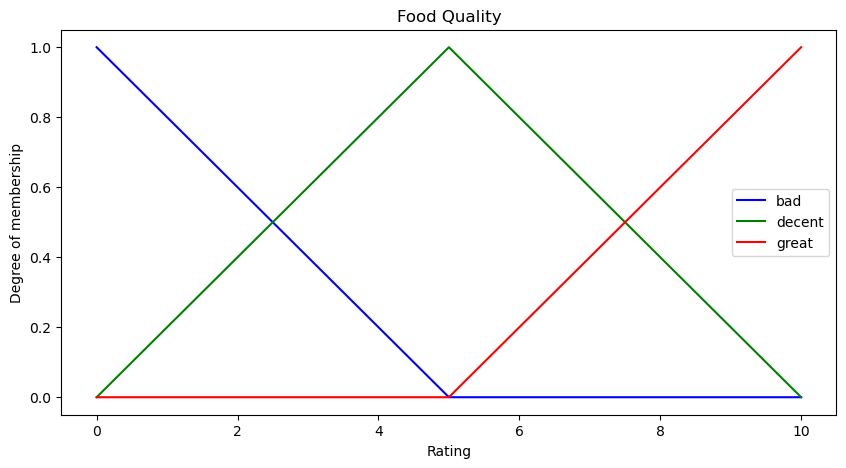

In [38]:
fig, ax = pl.subplots(figsize = (10, 5))

pl.xlabel('Rating')
pl.ylabel('Degree of membership')

ax.plot(univ_food, food_lo, 'b', linewidth = 1.5, label = 'bad')
ax.plot(univ_food, food_me, 'g', linewidth = 1.5, label = 'decent')
ax.plot(univ_food, food_hi, 'r', linewidth = 1.5, label = 'great')

ax.set_title('Food Quality')
ax.legend()

▪ **Question: What does it mean when the service quality rating equals to 2.0 or 8.0?**

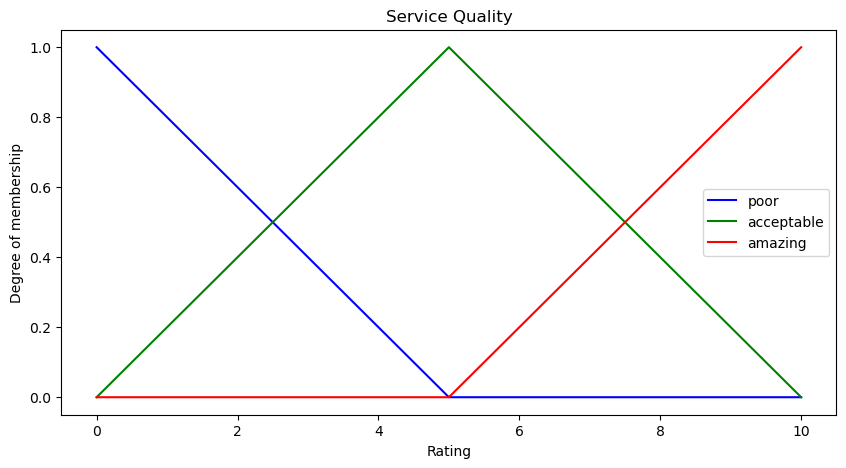

In [39]:
fig, ax = pl.subplots(figsize = (10, 5))

pl.xlabel('Rating')
pl.ylabel('Degree of membership')

ax.plot(univ_serv, serv_lo, 'b', linewidth = 1.5, label = 'poor')
ax.plot(univ_serv, serv_me, 'g', linewidth = 1.5, label = 'acceptable')
ax.plot(univ_serv, serv_hi, 'r', linewidth = 1.5, label = 'amazing')

ax.set_title('Service Quality')
ax.legend()

▪ **Question: Is 5% and 15% tip amounts considered as low, medium or high?**

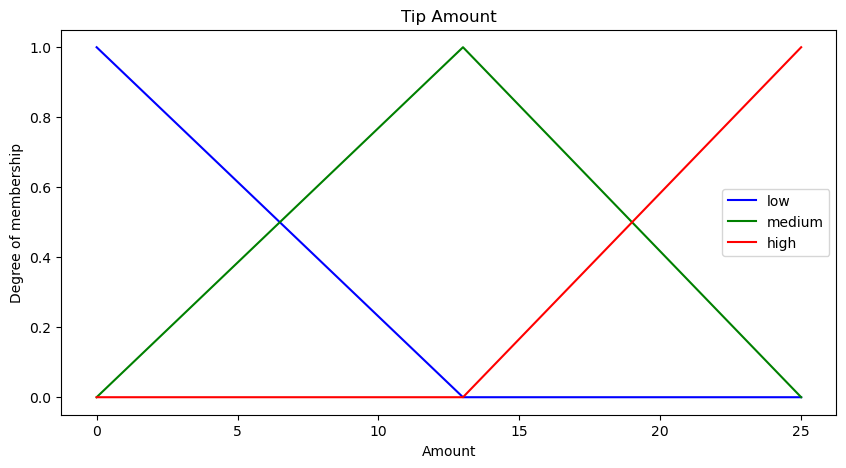

In [40]:
fig, ax = pl.subplots(figsize = (10, 5))

pl.xlabel('Amount')
pl.ylabel('Degree of membership')

ax.plot(univ_tip, tip_lo, 'b', linewidth = 1.5, label = 'low')
ax.plot(univ_tip, tip_me, 'g', linewidth = 1.5, label = 'medium')
ax.plot(univ_tip, tip_hi, 'r', linewidth = 1.5, label = 'high')

ax.set_title('Tip Amount')
ax.legend()

### interp_membership()

▪ We can use the **interp_membership()** function to find the degree of membership for a given input to a set (e.g., food quality = 6.5 and Service quality = 9.8).

In [41]:
food_level_lo = fuzz.interp_membership(univ_food, food_lo, user_input[0])
food_level_me = fuzz.interp_membership(univ_food, food_me, user_input[0])
food_level_hi = fuzz.interp_membership(univ_food, food_hi, user_input[0])

serv_level_lo = fuzz.interp_membership(univ_serv, serv_lo, user_input[1])
serv_level_me = fuzz.interp_membership(univ_serv, serv_me, user_input[1])
serv_level_hi = fuzz.interp_membership(univ_serv, serv_hi, user_input[1])

In [42]:
print(type(food_level_lo))

<class 'numpy.float64'>


▪ **Question: When food quality rating = 6.5/10, is it considered low, medium or high?**

In [43]:
print(food_level_lo)
print(food_level_me)
print(food_level_hi)

0.0
0.6
0.4


▪ **Question: When service quality rating = 9.8/10, is it considered low, medium or high?**

In [44]:
print(serv_level_lo)
print(serv_level_me)
print(serv_level_hi)

0.4
0.6
0.0


▪ **Tipping Problem: When Food quality = 6.5 and Service quality = 9.8, Tip = ?** 

### Fuzzy Rules

▪ A fuzzy rule is a conditional "if-then" statement that forms the basis for the fuzzy logic to obtain the fuzzy output.

▪ For this example, the following 3 simple rules are considered:

\>>> **If the food is bad OR the service is poor, then the tip will be low**

\>>> **If the service is acceptable, then the tip will be medium**

\>>> **If the food is great OR the service is amazing, then the tip will be high**

▪ Most people would agree on these rules, but the rules are fuzzy, for instance, how much tip is considered high? 

▪ Mapping the imprecise rules into a defined, actionable tip is a challenge but this is the kind of task at which fuzzy logic excels.

### Activation of Rule \#1

▪ **Rules \#1: If the food is bad OR the service is poor, then the tip will be low.**

\>>> **low top = tip_lo**

\>>> **low tip → bad food + poor service**

\>>> **bad food = food_level_lo**

\>>> **poor service = serv_level_lo**

In [45]:
food_level_lo

0.0

In [46]:
serv_level_lo

0.4

In [47]:
import numpy as np

# For rule 1, the use of OR operator in the antecedent means that the maximum value is chosen
active_rule_1 = np.fmax(food_level_lo, serv_level_lo)
active_rule_1

0.4

### Plotting The Degree of Membership to the Low Tip Amount Set

In [48]:
tip_lo

array([1.        , 0.92307692, 0.84615385, 0.76923077, 0.69230769,
       0.61538462, 0.53846154, 0.46153846, 0.38461538, 0.30769231,
       0.23076923, 0.15384615, 0.07692308, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

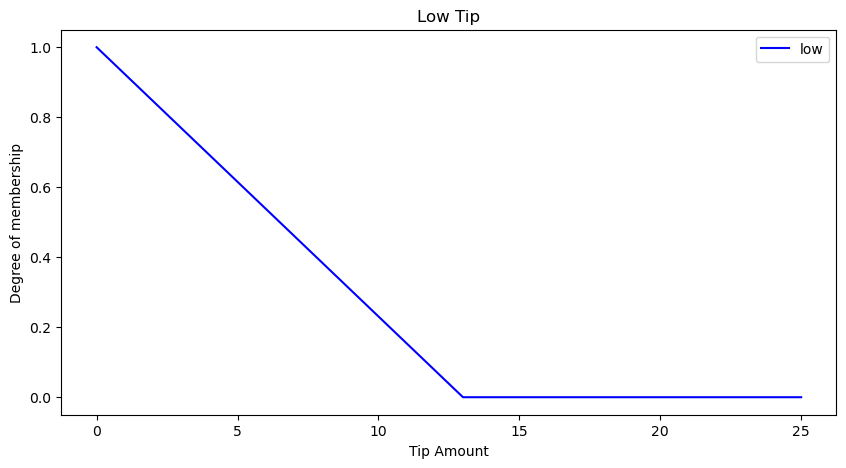

In [49]:
fig, ax = pl.subplots(figsize = (10, 5))

pl.xlabel('Tip Amount')
pl.ylabel('Degree of membership')

ax.plot(univ_tip, tip_lo, 'b', linewidth = 1.5, label = 'low')

ax.set_title('Low Tip')
ax.legend()

### Plotting The Degree of Membership of a given input to the Low Tip Amount Set

\>>> **active_rule_1 = bad food + poor service**

\>>> **active_rule_1 → tip_lo**

\>>> **tip_activation_lo → How much is the final tip amount defined by the "Low Tip Set"?**

In [50]:
tip_activation_lo = np.fmin(active_rule_1, tip_lo)
tip_activation_lo

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.38461538, 0.30769231,
       0.23076923, 0.15384615, 0.07692308, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [51]:
print(type(tip_activation_lo))

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Output membership activity')

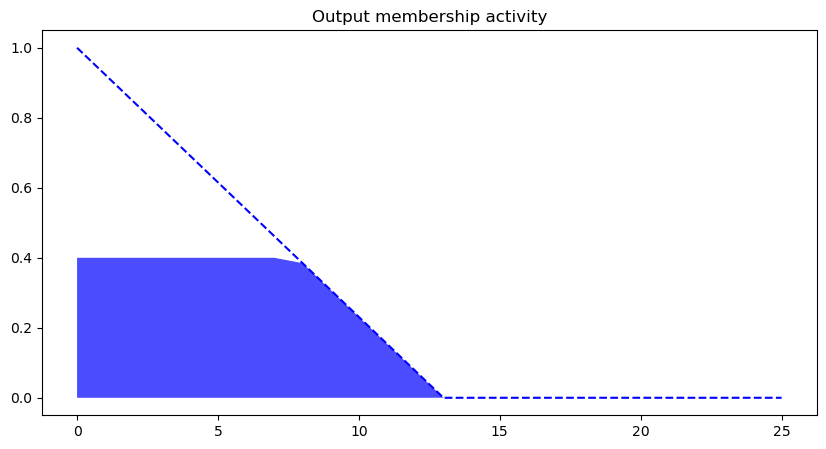

In [52]:
fig, ax = pl.subplots(figsize = (10, 5))

ax.plot(univ_tip, tip_lo, 'b', linewidth = 1.5, label = 'low', linestyle = '--') # the first plotting
ax.fill_between(univ_tip, tip_activation_lo, facecolor = 'b', alpha = 0.7) # the second plotting

ax.set_title('Output membership activity')

### Activation of Rule \#2

▪ **Rule \#2: If the service is acceptable, then the tip will be medium**

\>>> **medium tip = tip_me**

\>>> **medium tip → acceptable service**

\>>> **acceptable service = serv_level_me**

In [53]:
serv_level_me

0.6

### Plotting The Degree of Membership to the Medium Tip Amount Set

In [54]:
tip_me

array([0.        , 0.07692308, 0.15384615, 0.23076923, 0.30769231,
       0.38461538, 0.46153846, 0.53846154, 0.61538462, 0.69230769,
       0.76923077, 0.84615385, 0.92307692, 1.        , 0.91666667,
       0.83333333, 0.75      , 0.66666667, 0.58333333, 0.5       ,
       0.41666667, 0.33333333, 0.25      , 0.16666667, 0.08333333,
       0.        ])

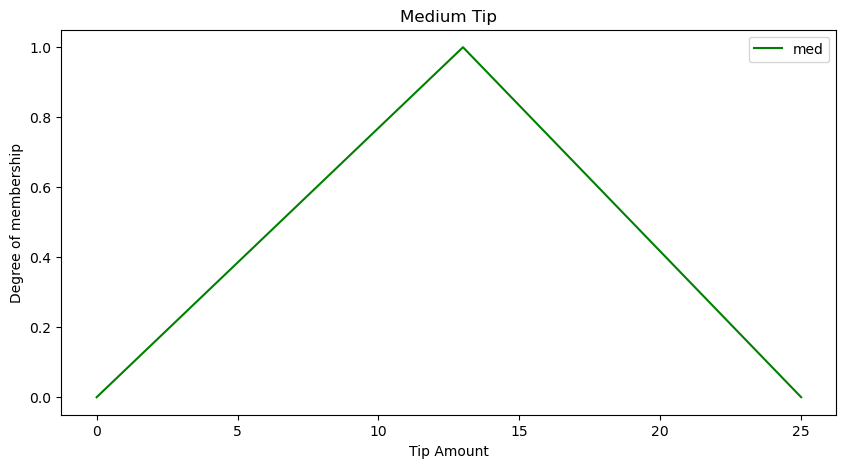

In [55]:
fig, ax = pl.subplots(figsize = (10, 5))

pl.xlabel('Tip Amount')
pl.ylabel('Degree of membership')

ax.plot(univ_tip, tip_me, 'g', linewidth = 1.5, label = 'med')

ax.set_title('Medium Tip')
ax.legend()

### Plotting The Degree of Membership of a given input to the Medium Tip Amount Set

\>>> **serv_level_me → tip_me**

\>>> **serv_level_me = active_rule_2**

\>>> **tip_activation_me → How much is the final tip amount defined by the "Medium Tip Set"?**

In [56]:
tip_activation_me = np.fmin(serv_level_me, tip_me)
tip_activation_me

array([0.        , 0.07692308, 0.15384615, 0.23076923, 0.30769231,
       0.38461538, 0.46153846, 0.53846154, 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.58333333, 0.5       ,
       0.41666667, 0.33333333, 0.25      , 0.16666667, 0.08333333,
       0.        ])

Text(0.5, 1.0, 'Output membership activity')

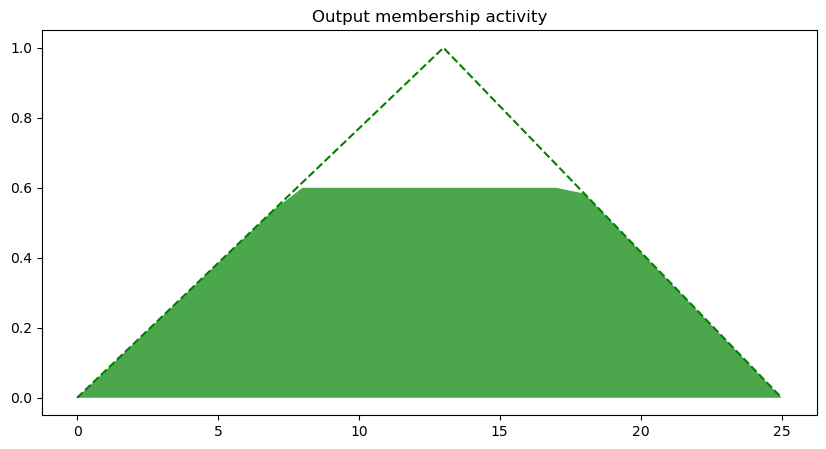

In [57]:
fig, ax = pl.subplots(figsize = (10, 5))

ax.plot(univ_tip, tip_me, 'g', linewidth = 1.5, label = 'med', linestyle = '--') # the first plotting
ax.fill_between(univ_tip, tip_activation_me, facecolor = 'g', alpha = 0.7) # the second plotting

ax.set_title('Output membership activity')

### Activation of Rule 3

▪ **Rule \#3: If the food is great OR the service is amazing, then the tip will be high**

\>>> **high top = tip_hi**

\>>> **high tip → great food + amazing service**

\>>> **great food = food_level_hi**

\>>> **amazing service = serv_level_hi**

In [58]:
food_level_hi

0.4

In [59]:
serv_level_hi

0.0

In [60]:
# For rule 3, the use of OR operator in antecedent means that the max value is selected from high service and high food
active_rule_3 = np.fmax(food_level_hi, serv_level_hi)
active_rule_3

0.4

### Plotting The Degree of Membership to the High Tip Amount Set

In [47]:
tip_hi

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08333333,
       0.16666667, 0.25      , 0.33333333, 0.41666667, 0.5       ,
       0.58333333, 0.66666667, 0.75      , 0.83333333, 0.91666667,
       1.        ])

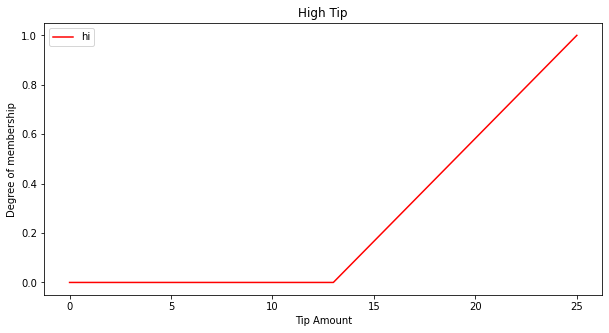

In [48]:
fig, ax = pl.subplots(figsize = (10, 5))

pl.xlabel('Tip Amount')
pl.ylabel('Degree of membership')

ax.plot(univ_tip, tip_hi, 'r', linewidth = 1.5, label = 'hi')

ax.set_title('High Tip')
ax.legend()

### Plotting The Degree of Membership of a given input to the Hi Tip Amount Set

\>>> **active_rule_3 = great food + amazing service**

\>>> **active_rule_3 → tip_hi**

\>>> **tip_activation_hi → How much is the final tip amount defined by the "Hi Tip Set"?**

In [61]:
tip_activation_hi = np.fmin(active_rule_3, tip_hi)
tip_activation_hi

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08333333,
       0.16666667, 0.25      , 0.33333333, 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       ])

Text(0.5, 1.0, 'Output membership activity')

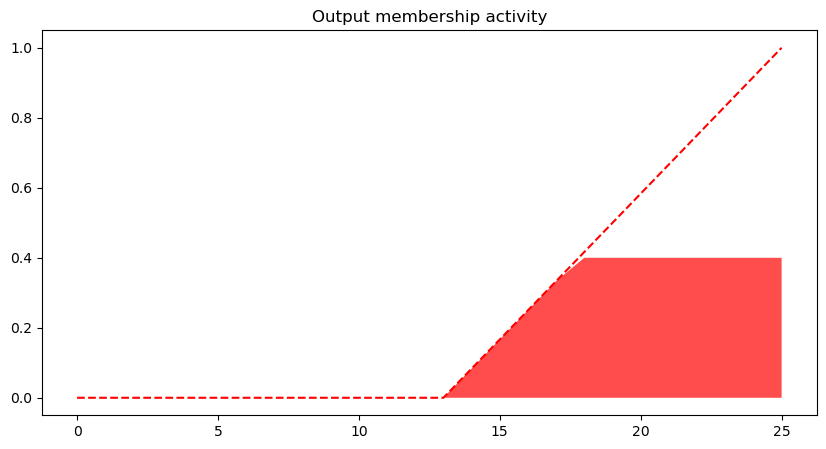

In [62]:
fig, ax = pl.subplots(figsize = (10, 5))

ax.plot(univ_tip, tip_hi, 'r', linewidth = 1.5, label = 'hi', linestyle = '--') # the first plotting
ax.fill_between(univ_tip, tip_activation_hi, facecolor = 'r', alpha = 0.7) # the second plotting

ax.set_title('Output membership activity')

### Aggregrating All the Three Output Memberships

In [63]:
tip_activation_lo

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.38461538, 0.30769231,
       0.23076923, 0.15384615, 0.07692308, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [64]:
tip_activation_me

array([0.        , 0.07692308, 0.15384615, 0.23076923, 0.30769231,
       0.38461538, 0.46153846, 0.53846154, 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.58333333, 0.5       ,
       0.41666667, 0.33333333, 0.25      , 0.16666667, 0.08333333,
       0.        ])

In [65]:
tip_activation_hi

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08333333,
       0.16666667, 0.25      , 0.33333333, 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       ])

In [66]:
# Aggregrate all three output membership functions together
aggregrated = np.fmax(tip_activation_lo, np.fmax(tip_activation_me, tip_activation_hi))

In [67]:
print(type(aggregrated))

<class 'numpy.ndarray'>


In [68]:
aggregrated

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.46153846, 0.53846154, 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.58333333, 0.5       ,
       0.41666667, 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       ])

### Visualizing the Degree of Membership to Tip Amount For All The 3 Rules

Text(0.5, 1.0, 'Output membership activity')

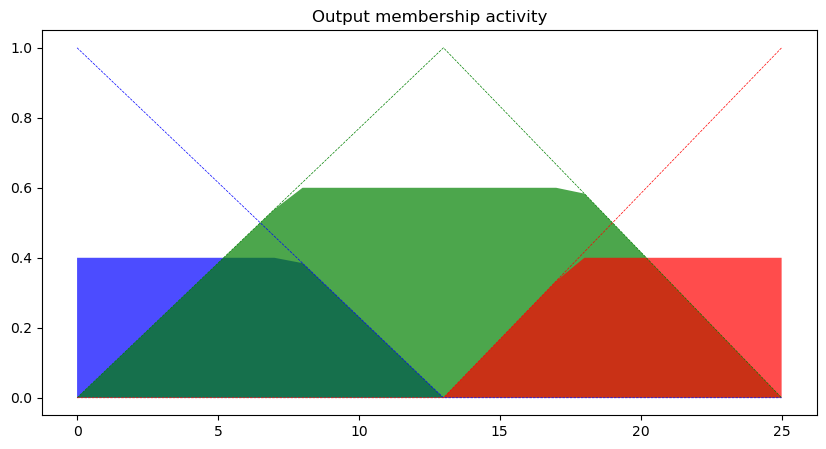

In [69]:
fig, ax = pl.subplots(figsize = (10, 5))

ax.fill_between(univ_tip, tip_activation_lo, facecolor = 'b', alpha = 0.7)
ax.plot(univ_tip, tip_lo, 'b', linewidth = 0.5, linestyle = '--')

ax.fill_between(univ_tip, tip_activation_me, facecolor = 'g', alpha = 0.7)
ax.plot(univ_tip, tip_me, 'g', linewidth = 0.5, linestyle = '--')

ax.fill_between(univ_tip, tip_activation_hi, facecolor = 'r', alpha = 0.7)
ax.plot(univ_tip, tip_hi, 'r', linewidth = 0.5, linestyle = '--')

ax.set_title('Output membership activity')

### Centroid Defuzzification

In [70]:
help(fuzz.defuzz)

Help on function defuzz in module skfuzzy.defuzzify.defuzz:

defuzz(x, mfx, mode)
    Defuzzification of a membership function, returning a defuzzified value
    of the function at x, using various defuzzification methods.
    
    Parameters
    ----------
    x : 1d array or iterable, length N
        Independent variable.
    mfx : 1d array of iterable, length N
        Fuzzy membership function.
    mode : string
        Controls which defuzzification method will be used.
        * 'centroid': Centroid of area
        * 'bisector': bisector of area
        * 'mom'     : mean of maximum
        * 'som'     : min of maximum
        * 'lom'     : max of maximum
    
    Returns
    -------
    u : float or int
        Defuzzified result.
    
    See Also
    --------
    skfuzzy.defuzzify.centroid, skfuzzy.defuzzify.dcentroid



In [71]:
# Calculate deffuzified results
tip = fuzz.defuzz(univ_tip, aggregrated, 'centroid')
tip

12.549743589743594

▪ Find the degree of membership for tip = 19.87 using the **interp_membership()**.

In [72]:
tip_activation = fuzz.interp_membership(univ_tip, aggregrated, tip) 
tip_activation

0.6

### Visualizing the Aggregrated Output Memberships and Their Centroid

Text(0.5, 1.0, 'Aggregrated membership and result (line)')

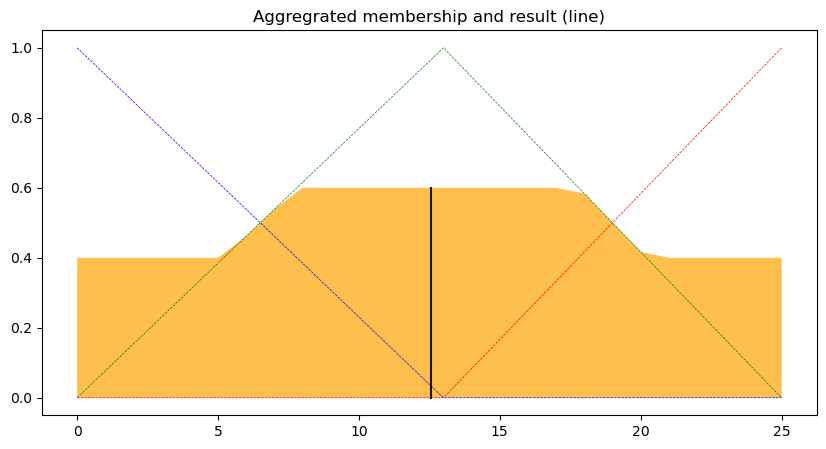

In [73]:
fig, ax = pl.subplots(figsize = (10, 5))

ax.plot(univ_tip, tip_lo, 'b', linewidth = 0.5, linestyle = '--')
ax.plot(univ_tip, tip_me, 'g', linewidth = 0.5, linestyle = '--')
ax.plot(univ_tip, tip_hi, 'r', linewidth = 0.5, linestyle = '--')

ax.fill_between(univ_tip, aggregrated, facecolor = 'Orange', alpha = 0.7) 
ax.plot([tip, tip], [0, tip_activation], 'k', linewidth = 1.5, alpha = 0.9)

ax.set_title('Aggregrated membership and result (line)')

### Printing the Output

In [74]:
tip_percentage = tip.item()
print("{}{:.2f}{}".format("Tip = ", tip_percentage, "%"))

if tip > 14:
    print("Tip is excellent")
elif tip > 7:
    print("Tip is good")
else:
    print("Tip is low")   

Tip = 12.55%
Tip is good


## <font color='red'> Exercise</font>

1. Please use fuzzy logic to implement a smart air conditioning system. The system must be
able to determine the cooling temperature automatically based on the room temperature
and room density. The membership functions and the rules suggested by an expert are as
follows:

**Suggested membership functions:**
- M1: Temperature on subjective ranges [0, 50] (in degree Celcious)
- M2: Density on subjective ranges [0, 30] (representing how many person)
- M3: Cooling temperature has a range of [16, 30] (in degree Celcious)

* Each of them should be represented with Low, Medium, and High triangular membership
function. You may estimate the range of each level.


**Suggested rules in your fuzzy inference system:**
- **R1:** If the room temperature is low AND the density is low, then the cooling temperature
will be moderate.
- **R2:** If the room temperature is medium AND the density is high, then the cooling
temperature will be low
- **R3:** If the room temperature is high then the cooling temperature will be low.


**What would the cooling temperature be in the following circumstance?**
- room_temperature =16
- room_density = 25
- References:

### Reference:
Scikit-fuzzy documentation is available at http://pythonhosted.org/scikit-fuzzy/